<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/dos%20results%20ver%201/final%20models/fft_r1_model_single-unbalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201/router%20fetch/2-fft-normal-n-0-3-data-r1-good-single.csv?token=AKVFSOELHJ7WRSXRTQ262AS6ZAQOI')
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201/router%20fetch/2-fft-normal-n-0-3-m-1-data-r1-mal.csv?token=AKVFSOCU2QW4UCWHXVST5VC6ZAQOK')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201/router%20fetch/2-fft-normal-n-0-3-m-15-data-r1-mal.csv?token=AKVFSOHE3JH43RE4TFW4NNK6ZAQOO')
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201/router%20fetch/2-fft-normal-n-0-3-m-9-data-r1-mal.csv?token=AKVFSOBZDLYK6FA4SURMHL26ZAQTK')

In [0]:
print(df.shape)
print(df1.shape)
print(df2.shape)
print(df3.shape)

(56917, 30)
(89541, 30)
(48503, 30)
(51294, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')

In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.182519,0.224702,0.003674,-0.005556,-0.443310,-0.360677,-0.029549,0.217549,-0.350255,-0.590847,0.071495,-0.075465,0.073371,-0.001395,0.022184,0.020260,0.497404,0.132583,0.102384,0.059600,0.004796,-0.415473,-0.233193,0.105340
inport,-0.182519,1.000000,-0.103438,0.022289,-0.033649,-0.216953,-0.368169,0.003136,0.295486,0.122535,0.190703,0.162323,-0.058598,-0.184036,-0.161698,-0.125458,-0.098802,0.636280,-0.010909,-0.022593,-0.014408,-0.199792,-0.283848,-0.251975,0.252258
cache_coherence_type,0.224702,-0.103438,1.000000,0.344410,-0.520289,-0.132086,-0.187823,0.011278,-0.048191,-0.090952,-0.120196,-0.403135,0.062257,-0.043374,0.012584,0.026051,0.023476,0.048212,0.537587,0.429975,0.320345,0.885215,-0.157551,0.533232,0.009484
flit_id,0.003674,0.022289,0.344410,1.000000,-0.025473,0.091418,0.021974,0.017010,0.039508,0.020223,-0.002779,0.492629,0.006796,0.047093,0.035913,0.051165,0.032009,0.015794,0.964507,0.927837,0.711128,0.369128,0.063662,0.300496,-0.005488
flit_type,-0.005556,-0.033649,-0.520289,-0.025473,1.000000,-0.138089,-0.033185,-0.025753,-0.059691,-0.030540,0.004218,0.546180,-0.132173,0.171457,0.026180,-0.009648,-0.008394,-0.023834,-0.118465,0.135987,0.100839,-0.557623,-0.096160,-0.453937,0.008310
vnet,-0.443310,-0.216953,-0.132086,0.091418,-0.138089,1.000000,0.937491,-0.002276,-0.060117,0.490301,0.519347,-0.136712,0.074192,0.068535,0.095118,0.056951,0.033289,-0.334210,-0.029163,-0.036311,-0.029671,0.344181,0.989254,0.768124,-0.207381
vc,-0.360677,-0.368169,-0.187823,0.021974,-0.033185,0.937491,1.000000,-0.007089,-0.149727,0.333428,0.368687,-0.130813,0.072153,0.132031,0.136074,0.090360,0.062249,-0.434785,-0.092220,-0.076475,-0.064422,0.262052,0.978297,0.678772,-0.233276
traversal_id,-0.029549,0.003136,0.011278,0.017010,-0.025753,-0.002276,-0.007089,1.000000,0.048893,-0.002499,-0.025983,0.019770,-0.023543,-0.023455,-0.031321,-0.035384,-0.036935,-0.021119,0.011468,0.007482,0.507649,0.009615,-0.004334,0.005343,-0.022312
hop_count,0.217549,0.295486,-0.048191,0.039508,-0.059691,-0.060117,-0.149727,0.048893,1.000000,0.373102,-0.095276,0.211283,-0.114658,-0.092820,-0.138269,-0.114513,-0.102229,0.543760,0.024344,0.003873,0.026650,-0.073859,-0.098696,-0.082436,0.093649
current_hop,-0.350255,0.122535,-0.090952,0.020223,-0.030540,0.490301,0.333428,-0.002499,0.373102,1.000000,0.794874,0.184788,0.012844,-0.079820,-0.044635,-0.050849,-0.046094,0.083555,-0.049227,-0.039267,-0.032786,0.143946,0.432004,0.359695,-0.036778


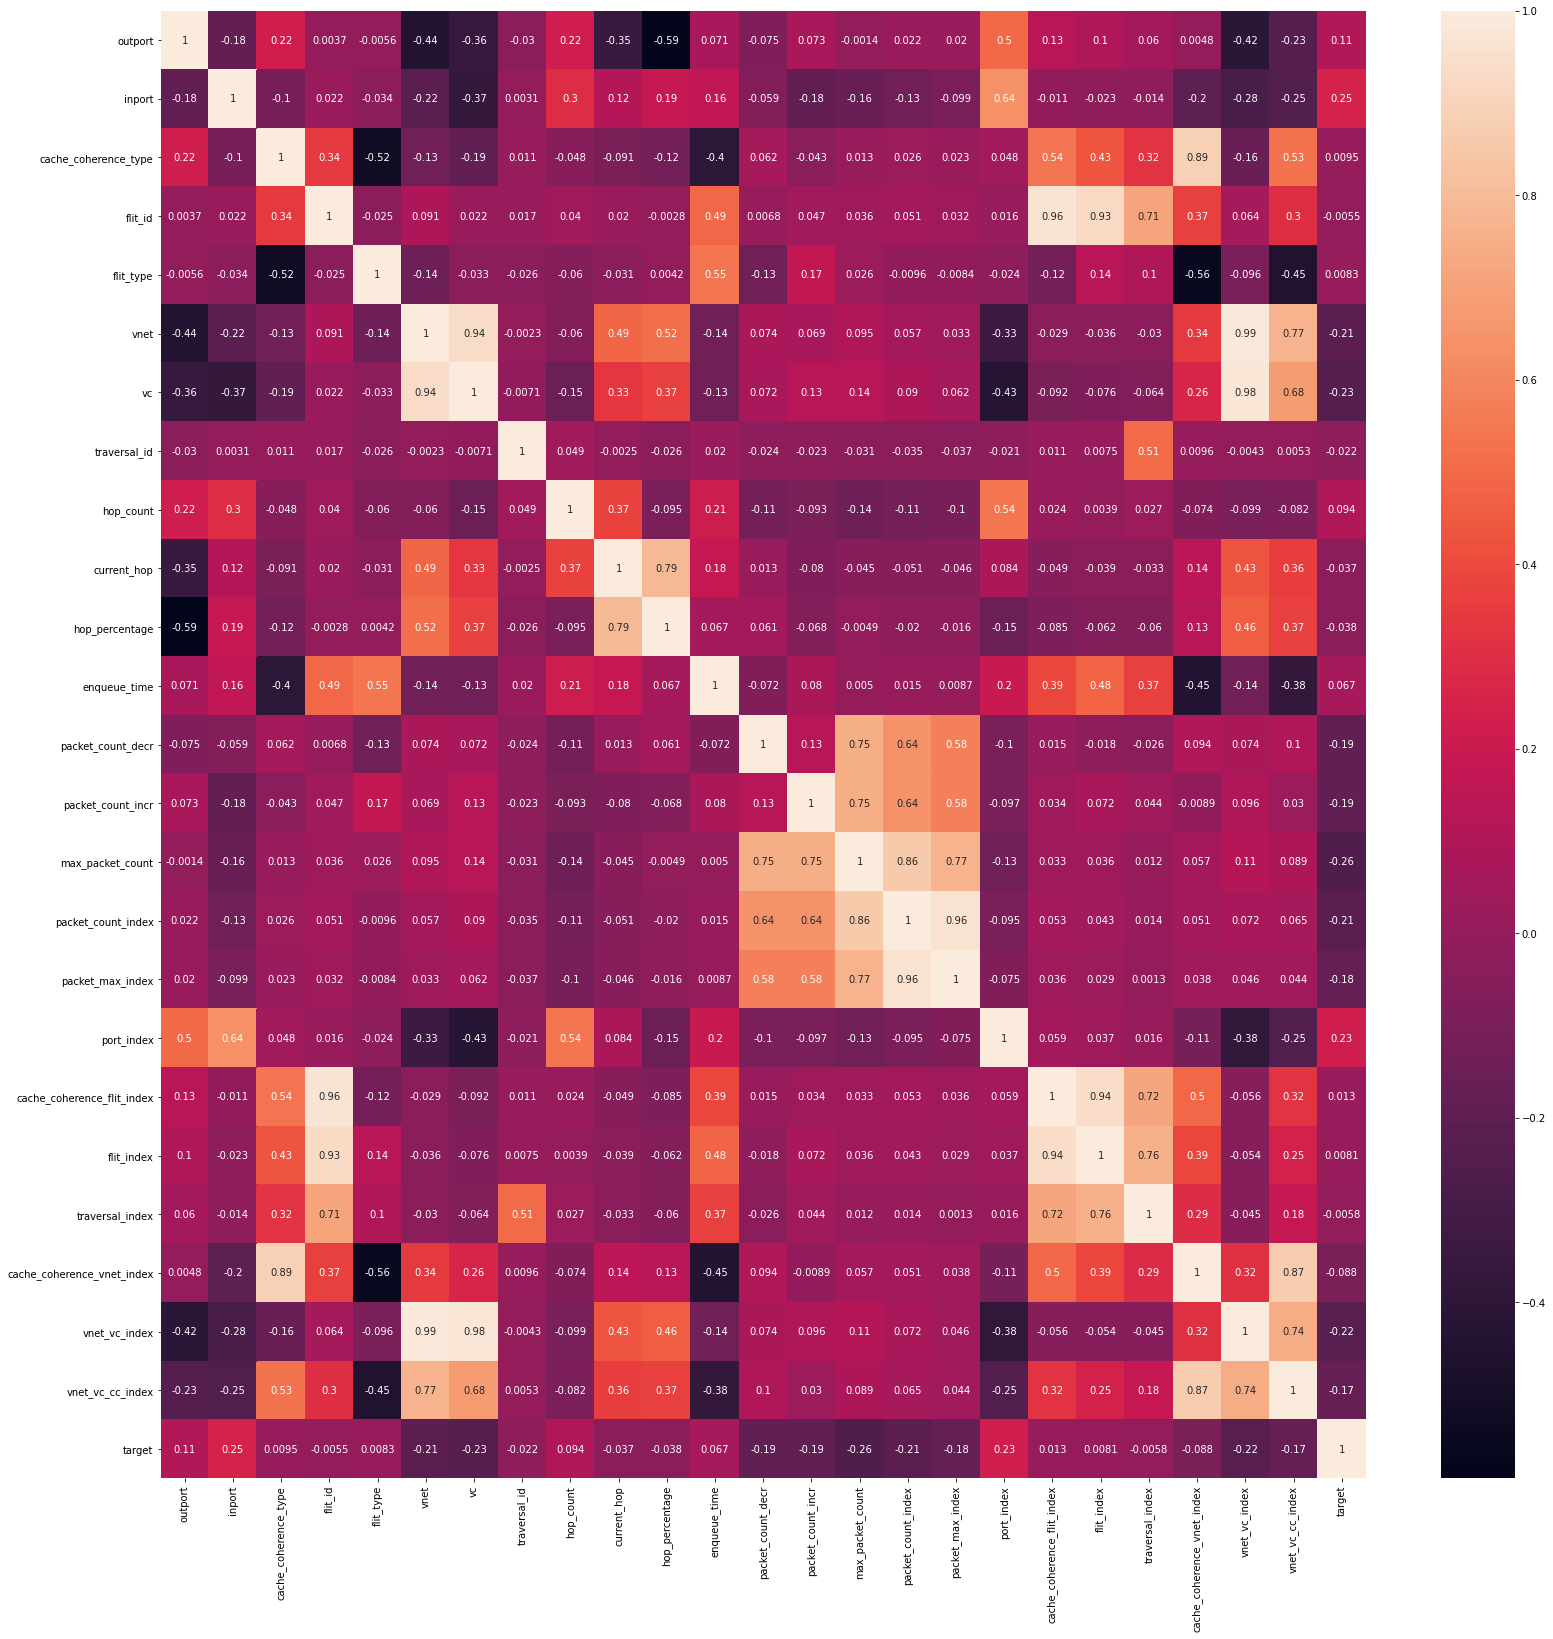

In [0]:
plt.figure(figsize=(27,27))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,0,1,1,4,3,9,2,3,0,0.000000,4,8,1,8,8,64,0,1,4,8,3,27,9
1,2,4,1,1,4,3,9,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9
2,2,4,1,1,4,3,9,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9
3,2,4,1,1,4,3,9,1,4,1,0.250000,8,7,2,8,14,112,8,1,4,4,3,27,9
4,4,2,1,1,4,3,9,3,5,2,0.400000,12,1,2,2,2,4,8,1,4,12,3,27,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194956,4,2,6,2,2,3,9,20042,3,1,0.333333,15,5,1,5,5,25,8,12,24,481008,18,27,54
194957,4,2,6,3,2,3,9,20042,3,1,0.333333,22,4,2,5,8,40,8,18,36,721512,18,27,54
194958,4,2,6,4,2,3,9,20042,3,1,0.333333,29,3,3,5,9,45,8,24,48,962016,18,27,54
194959,4,2,6,5,3,3,9,20042,3,1,0.333333,36,2,4,5,8,40,8,30,90,1803780,18,27,54


In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000049,0.500000,0.0,0.000000,0.000000,0.205882,0.000000,0.205882,0.021672,0.005556,0.0,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.2,0.250000,0.062500,0.029412,0.000000,0.029412,0.003096,0.000265,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.2,0.250000,0.062500,0.029412,0.000000,0.029412,0.003096,0.000265,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.2,0.250000,0.062500,0.176471,0.029412,0.205882,0.040248,0.009789,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.0,0.5,0.000000,0.00,1.000000,0.0,0.000,0.000099,0.833333,0.4,0.400000,0.125000,0.000000,0.029412,0.029412,0.003096,0.000265,1.0,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194956,1.0,0.5,0.833333,0.25,0.333333,0.0,0.000,0.988849,0.500000,0.2,0.333333,0.171875,0.117647,0.000000,0.117647,0.012384,0.002117,1.0,0.379310,0.232558,0.263757,0.833333,0.000000,0.494505
194957,1.0,0.5,0.833333,0.50,0.333333,0.0,0.000,0.988849,0.500000,0.2,0.333333,0.281250,0.088235,0.029412,0.117647,0.021672,0.003439,1.0,0.586207,0.372093,0.395636,0.833333,0.000000,0.494505
194958,1.0,0.5,0.833333,0.75,0.333333,0.0,0.000,0.988849,0.500000,0.2,0.333333,0.390625,0.058824,0.058824,0.117647,0.024768,0.003880,1.0,0.793103,0.511628,0.527515,0.833333,0.000000,0.494505
194959,1.0,0.5,0.833333,1.00,0.666667,0.0,0.000,0.988849,0.500000,0.2,0.333333,0.500000,0.029412,0.088235,0.117647,0.021672,0.003439,1.0,1.000000,1.000000,0.989093,0.833333,0.000000,0.494505


In [0]:
train_X[train_X.duplicated()].shape

(1398, 24)

In [0]:
test_X = df3.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df3['target']

In [0]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.5,0.250000,0.063492,0.034483,0.000000,0.034483,0.004184,0.000417,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000143,0.8,1.0,0.400000,0.126984,0.000000,0.034483,0.034483,0.004184,0.000417,1.00,0.000000,0.000000,0.000006,0.000000,0.000000,0.000000
2,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000382,0.4,0.5,0.333333,0.063492,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000017,0.000000,0.000000,0.000000
3,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000525,0.6,0.5,0.250000,0.063492,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000023,0.000000,0.000000,0.000000
4,0.25,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000573,0.4,1.0,0.666667,0.126984,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000025,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51289,1.00,0.5,0.666667,0.25,0.333333,0.0,0.000000,0.999905,0.6,1.0,0.500000,0.238095,0.137931,0.034483,0.172414,0.037657,0.008196,1.00,0.310345,0.186047,0.222284,0.666667,0.000000,0.666667
51290,1.00,0.5,0.666667,0.50,0.333333,0.0,0.000000,0.999905,0.6,1.0,0.500000,0.349206,0.103448,0.068966,0.172414,0.046025,0.009862,1.00,0.482759,0.302326,0.333427,0.666667,0.000000,0.666667
51291,1.00,0.5,0.666667,0.75,0.333333,0.0,0.000000,0.999905,0.6,1.0,0.500000,0.460317,0.068966,0.103448,0.172414,0.046025,0.009862,1.00,0.655172,0.418605,0.444571,0.666667,0.000000,0.666667
51292,1.00,0.5,0.666667,1.00,0.666667,0.0,0.000000,0.999905,0.6,1.0,0.500000,0.571429,0.034483,0.137931,0.172414,0.037657,0.008196,1.00,0.827586,0.825581,0.833572,0.666667,0.000000,0.666667


In [0]:
test_X[test_X.duplicated()].shape

(46, 24)

#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    138044
1     56917
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
5                         vnet  6064.894741
22               vnet_vc_index  5357.382676
6                           vc  4766.515851
17                  port_index  3619.529649
1                       inport  2714.331907
14            max_packet_count  1903.179757
13           packet_count_incr   959.547228
12           packet_count_decr   943.656044
15          packet_count_index   908.755388
23            vnet_vc_cc_index   618.116045
16            packet_max_index   611.968281
0                      outport   503.620660
21  cache_coherence_vnet_index   143.297397
8                    hop_count   127.742232
11                enqueue_time    65.648703
10              hop_percentage    62.625667
9                  current_hop    32.685542


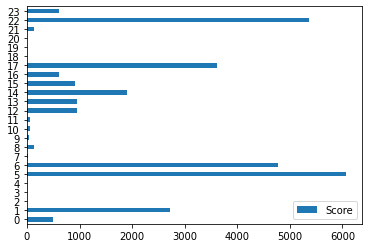

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=10,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 71.16908596635207
Test Prediction  71.30510604467469


In [278]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  96.80469450618006


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
15,packet_count_index,4.594880
1,inport,2.628636
0,outport,1.962427
2,cache_coherence_type,1.878715
6,vc,1.185365
9,current_hop,0.851290
18,cache_coherence_flit_index,0.385290
10,hop_percentage,0.349167
4,flit_type,0.166858
3,flit_id,0.027912


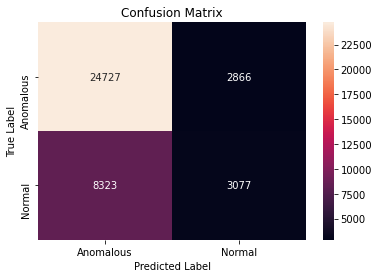

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82     27593
           1       0.52      0.27      0.35     11400

    accuracy                           0.71     38993
   macro avg       0.63      0.58      0.59     38993
weighted avg       0.68      0.71      0.68     38993



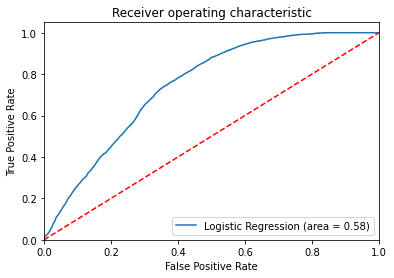

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

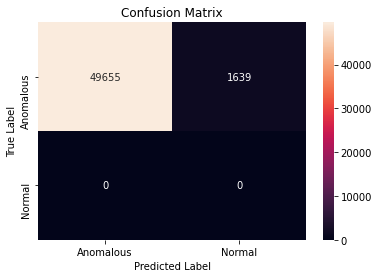

In [0]:
cm = confusion_matrix(test_Y, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     51294
           1       0.00      0.00      0.00         0

    accuracy                           0.97     51294
   macro avg       0.50      0.48      0.49     51294
weighted avg       1.00      0.97      0.98     51294



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 86.38823348379154
Test Prediction  79.78868001949067


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  75.45911802550006


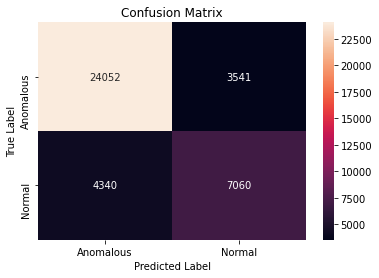

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     27593
           1       0.67      0.62      0.64     11400

    accuracy                           0.80     38993
   macro avg       0.76      0.75      0.75     38993
weighted avg       0.79      0.80      0.80     38993



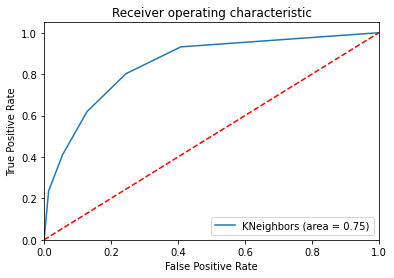

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

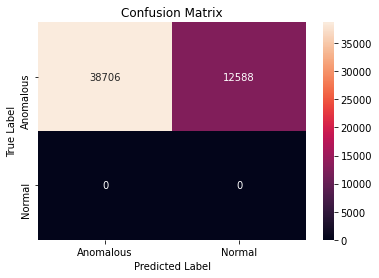

In [0]:
cm = confusion_matrix(test_Y, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y,y_pred_knn_test))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86     51294
           1       0.00      0.00      0.00         0

    accuracy                           0.75     51294
   macro avg       0.50      0.38      0.43     51294
weighted avg       1.00      0.75      0.86     51294



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 47.14172137874436
Test Prediction Score 47.20077962711256


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 38.717978710960345


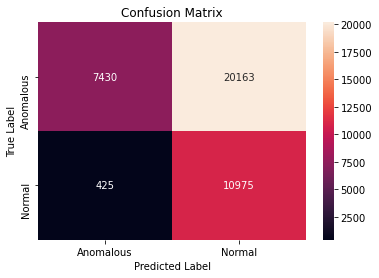

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.95      0.27      0.42     27593
           1       0.35      0.96      0.52     11400

    accuracy                           0.47     38993
   macro avg       0.65      0.62      0.47     38993
weighted avg       0.77      0.47      0.45     38993



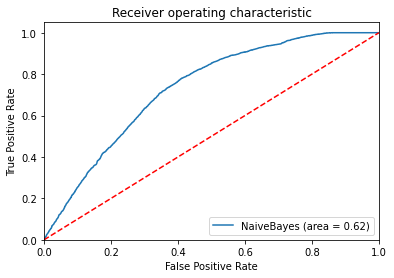

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

2-Layer Neural Network

In [262]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 124774 samples, validate on 31194 samples
Epoch 1/10
124774/124774 [==============================] - 5s 40us/step - loss: 0.1805 - accuracy: 0.7106 - val_loss: 0.1774 - val_accuracy: 0.7075
Epoch 2/10
124774/124774 [==============================] - 5s 39us/step - loss: 0.1775 - accuracy: 0.7088 - val_loss: 0.1762 - val_accuracy: 0.7100
Epoch 3/10
124774/124774 [==============================] - 5s 39us/step - loss: 0.1765 - accuracy: 0.7075 - val_loss: 0.1754 - val_accuracy: 0.7100
Epoch 4/10
124774/124774 [==============================] - 5s 38us/step - loss: 0.1757 - accuracy: 0.7085 - val_loss: 0.1746 - val_accuracy: 0.7140
Epoch 5/10
124774/124774 [==============================] - 5s 39us/step - loss: 0.1751 - accuracy: 0.7116 - val_loss: 0.1740 - val_accuracy: 0.7129
Epoch 6/10
124774/124774 [==============================] - 5s 38us/step - loss: 0.1742 - accuracy: 0.7111 - val_loss: 0.1723 - val_accuracy: 0.7131
Epoch 7/10
124774/124774 [=============================

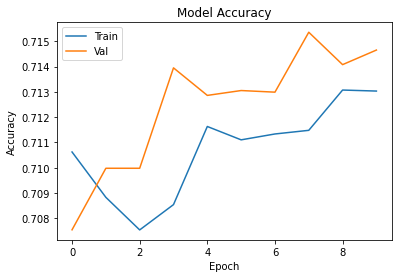

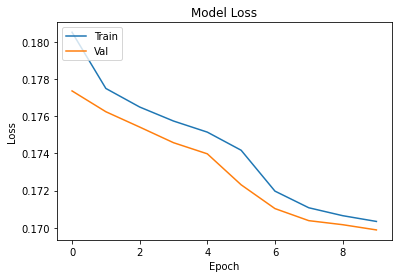

In [263]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [264]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 71.27%


In [265]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 73.68%


3-Layer Neural Network

In [272]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 124774 samples, validate on 31194 samples
Epoch 1/30
124774/124774 [==============================] - 5s 38us/step - loss: 0.2106 - accuracy: 0.7051 - val_loss: 0.2045 - val_accuracy: 0.7100
Epoch 2/30
124774/124774 [==============================] - 5s 38us/step - loss: 0.2026 - accuracy: 0.7077 - val_loss: 0.1980 - val_accuracy: 0.7100
Epoch 3/30
124774/124774 [==============================] - 5s 37us/step - loss: 0.1948 - accuracy: 0.7077 - val_loss: 0.1907 - val_accuracy: 0.7100
Epoch 4/30
124774/124774 [==============================] - 5s 38us/step - loss: 0.1891 - accuracy: 0.7077 - val_loss: 0.1862 - val_accuracy: 0.7100
Epoch 5/30
124774/124774 [==============================] - 5s 38us/step - loss: 0.1854 - accuracy: 0.7077 - val_loss: 0.1829 - val_accuracy: 0.7100
Epoch 6/30
124774/124774 [==============================] - 5s 38us/step - loss: 0.1823 - accuracy: 0.7077 - val_loss: 0.1799 - val_accuracy: 0.7100
Epoch 7/30
124774/124774 [=============================

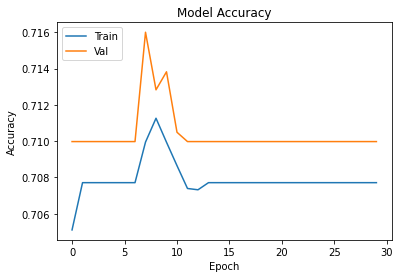

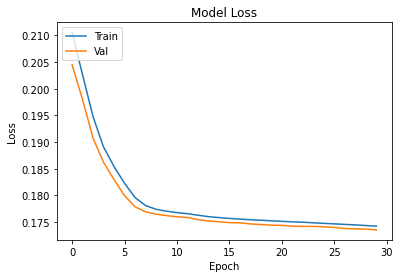

In [273]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [275]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 70.76%


In [276]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 100.00%


4-Layer Neural Network



In [280]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 124774 samples, validate on 31194 samples
Epoch 1/30
124774/124774 [==============================] - 5s 39us/step - loss: 0.2117 - accuracy: 0.7010 - val_loss: 0.2050 - val_accuracy: 0.7100
Epoch 2/30
124774/124774 [==============================] - 5s 39us/step - loss: 0.1995 - accuracy: 0.7076 - val_loss: 0.1933 - val_accuracy: 0.7094
Epoch 3/30
124774/124774 [==============================] - 5s 39us/step - loss: 0.1903 - accuracy: 0.7091 - val_loss: 0.1864 - val_accuracy: 0.7101
Epoch 4/30
124774/124774 [==============================] - 5s 39us/step - loss: 0.1844 - accuracy: 0.7113 - val_loss: 0.1815 - val_accuracy: 0.7125
Epoch 5/30
124774/124774 [==============================] - 5s 39us/step - loss: 0.1808 - accuracy: 0.7127 - val_loss: 0.1790 - val_accuracy: 0.7171
Epoch 6/30
124774/124774 [==============================] - 5s 39us/step - loss: 0.1791 - accuracy: 0.7142 - val_loss: 0.1778 - val_accuracy: 0.7162
Epoch 7/30
124774/124774 [=============================

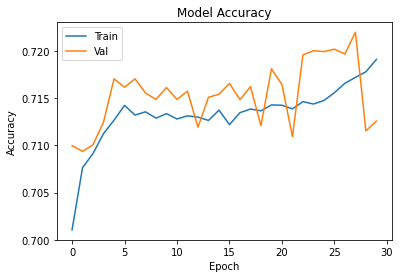

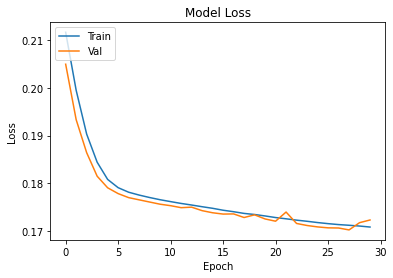

In [282]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [283]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 71.15%


In [284]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 63.19%


5-Layer Neural Network Optimized

In [286]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 124774 samples, validate on 31194 samples
Epoch 1/100
124774/124774 [==============================] - 10s 78us/step - loss: 0.1699 - accuracy: 0.7248 - val_loss: 0.1653 - val_accuracy: 0.7296
Epoch 2/100
124774/124774 [==============================] - 10s 78us/step - loss: 0.1636 - accuracy: 0.7379 - val_loss: 0.1642 - val_accuracy: 0.7277
Epoch 3/100
124774/124774 [==============================] - 10s 79us/step - loss: 0.1603 - accuracy: 0.7474 - val_loss: 0.1530 - val_accuracy: 0.7642
Epoch 4/100
124774/124774 [==============================] - 10s 78us/step - loss: 0.1581 - accuracy: 0.7522 - val_loss: 0.1507 - val_accuracy: 0.7734
Epoch 5/100
124774/124774 [==============================] - 10s 82us/step - loss: 0.1568 - accuracy: 0.7558 - val_loss: 0.1504 - val_accuracy: 0.7640
Epoch 6/100
124774/124774 [==============================] - 9s 73us/step - loss: 0.1553 - accuracy: 0.7593 - val_loss: 0.1472 - val_accuracy: 0.7729
Epoch 7/100
124774/124774 [=================

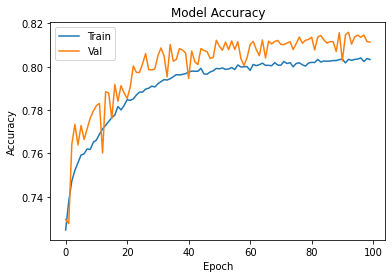

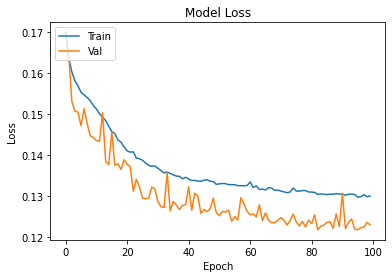

In [288]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [289]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.95%


In [290]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 90.42%


In [291]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 124774 samples, validate on 31194 samples
Epoch 1/50
124774/124774 [==============================] - 11s 89us/step - loss: 0.1731 - accuracy: 0.7165 - val_loss: 0.1629 - val_accuracy: 0.7331
Epoch 2/50
124774/124774 [==============================] - 11s 88us/step - loss: 0.1644 - accuracy: 0.7340 - val_loss: 0.1675 - val_accuracy: 0.7386
Epoch 3/50
124774/124774 [==============================] - 11s 88us/step - loss: 0.1622 - accuracy: 0.7392 - val_loss: 0.1575 - val_accuracy: 0.7475
Epoch 4/50
124774/124774 [==============================] - 11s 86us/step - loss: 0.1610 - accuracy: 0.7437 - val_loss: 0.1549 - val_accuracy: 0.7629
Epoch 5/50
124774/124774 [==============================] - 10s 84us/step - loss: 0.1595 - accuracy: 0.7469 - val_loss: 0.1541 - val_accuracy: 0.7571
Epoch 6/50
124774/124774 [==============================] - 10s 83us/step - loss: 0.1585 - accuracy: 0.7503 - val_loss: 0.1541 - val_accuracy: 0.7600
Epoch 7/50
124774/124774 [=======================

In [292]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.47%


In [293]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 85.84%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 98.01241280262619
Test Prediction Score 92.69356038263278


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 72.749249424884


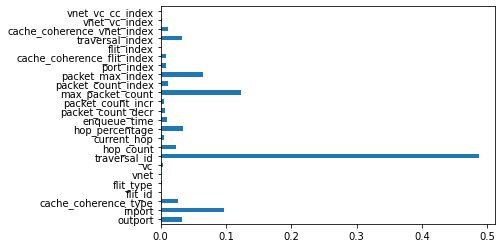

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

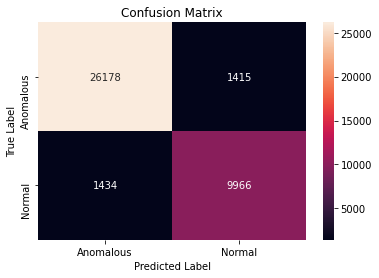

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     27593
           1       0.88      0.87      0.87     11400

    accuracy                           0.93     38993
   macro avg       0.91      0.91      0.91     38993
weighted avg       0.93      0.93      0.93     38993



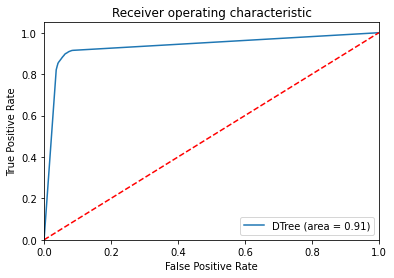

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 99.65056934755847
Test Prediction Score 93.74503115943888


In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 75.55659531329201


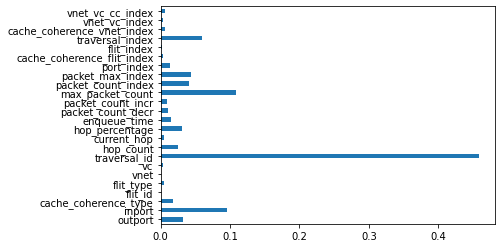

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

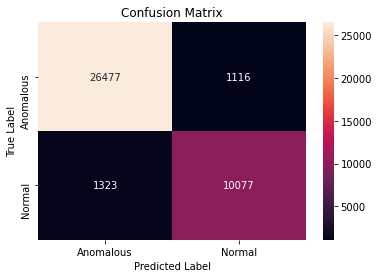

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     27593
           1       0.90      0.88      0.89     11400

    accuracy                           0.94     38993
   macro avg       0.93      0.92      0.92     38993
weighted avg       0.94      0.94      0.94     38993



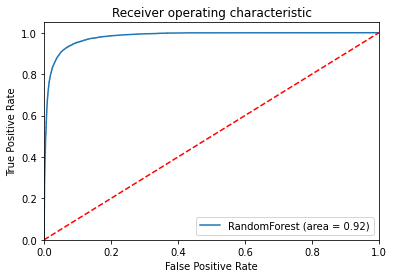

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [239]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [241]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.81470558063192
Test Prediction Score 96.09673531146616


In [242]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 90.49401489452957


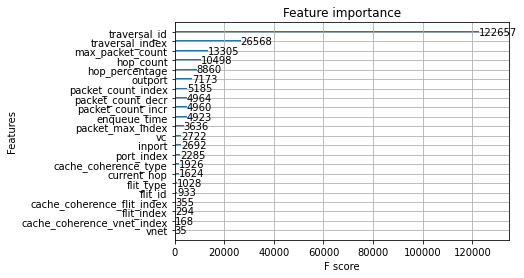

In [244]:
plot_importance(xgbc)
plt.show()

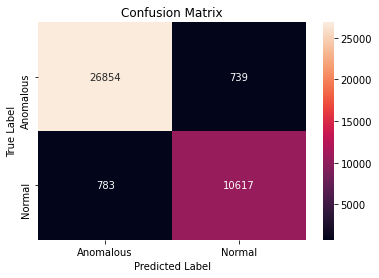

In [245]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [246]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     27593
           1       0.93      0.93      0.93     11400

    accuracy                           0.96     38993
   macro avg       0.95      0.95      0.95     38993
weighted avg       0.96      0.96      0.96     38993



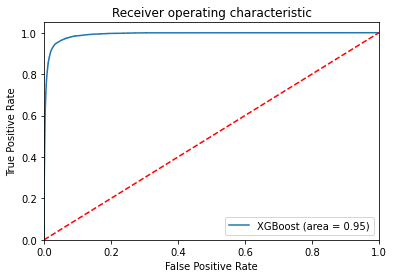

In [247]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [249]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [251]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 89.56196142798522
Test Prediction Score 87.55930551637474


In [252]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 87.73930674152922


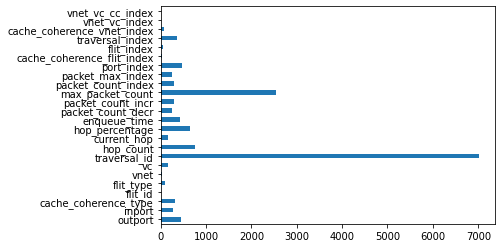

In [254]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

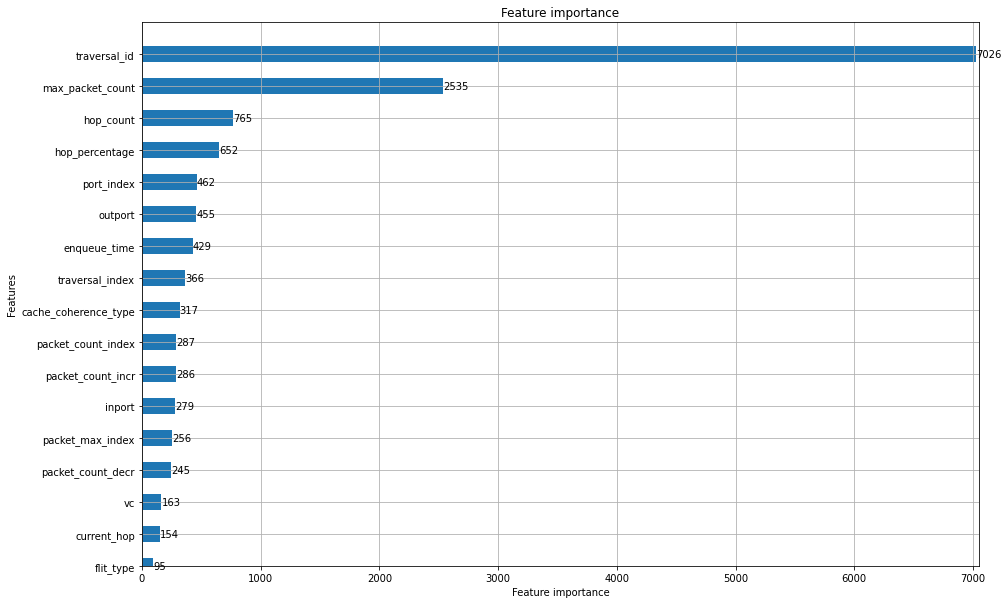

In [260]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,7050), ylim = (0,17), figsize = (15,10))
plt.show()

In [256]:
sorted(gbm.feature_importances_,reverse=True)

[7026,
 2535,
 765,
 652,
 462,
 455,
 429,
 366,
 317,
 287,
 286,
 279,
 256,
 245,
 163,
 154,
 95,
 86,
 64,
 35,
 28,
 15,
 0,
 0]

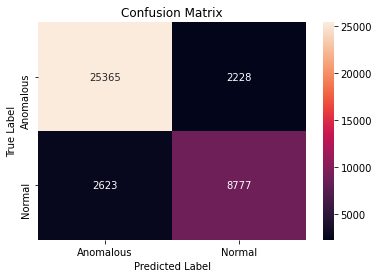

In [257]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [258]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     27593
           1       0.80      0.77      0.78     11400

    accuracy                           0.88     38993
   macro avg       0.85      0.84      0.85     38993
weighted avg       0.87      0.88      0.87     38993



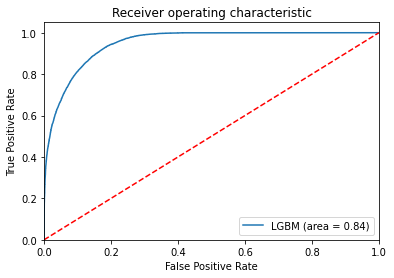

In [259]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()